<a href="https://colab.research.google.com/github/ellenbeatryzbarone/DeltaV_AerospaceUPE/blob/main/TratamentodeImagens_redu%C3%A7%C3%A3oderu%C3%ADdos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

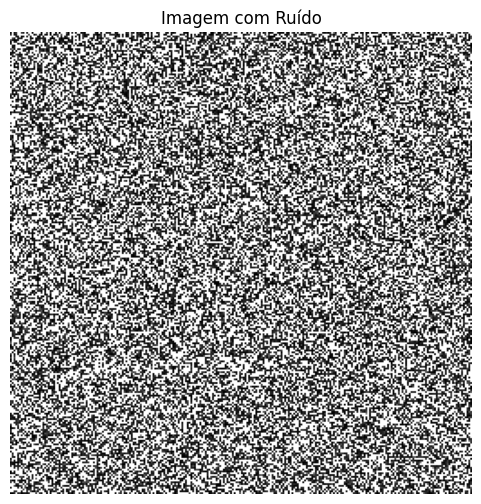

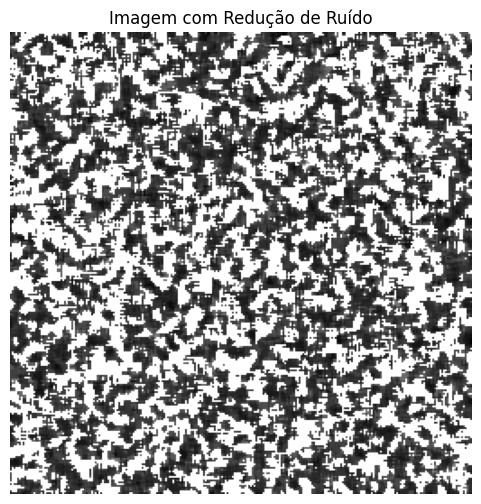

Tamanho da imagem comprimida: 56098 bytes


In [1]:
# Instalar bibliotecas necessárias
!pip install numpy matplotlib opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Criar uma imagem sintética com ruído (simulando uma imagem de satélite)
np.random.seed(42)
imagem = np.ones((256, 256), dtype=np.uint8) * 100  # imagem com intensidade média
ruido = np.random.normal(0, 25, (256,256)).astype(np.uint8)
imagem_ruidosa = cv2.add(imagem, ruido, dtype=cv2.CV_8U)

# Mostrar a imagem ruidosa
plt.figure(figsize=(6,6))
plt.title("Imagem com Ruído")
plt.imshow(imagem_ruidosa, cmap='gray')
plt.axis('off')
plt.show()

# **Processo de tratamento: redução de ruído usando filtro median**
imagem_tratada = cv2.medianBlur(imagem_ruidosa, 5)

# Mostrar a imagem tratada
plt.figure(figsize=(6,6))
plt.title("Imagem com Redução de Ruído")
plt.imshow(imagem_tratada, cmap='gray')
plt.axis('off')
plt.show()

# **Preparação para envio: normalização e compactação trivial (exemplo simples)**
# Normalizar para [0,1]
imagem_final = imagem_tratada / 255.0

# Compactar usando JPEG
# Salvando a imagem em buffer para simular transmissão
import io
_, buffer = cv2.imencode('.jpg', (imagem_tratada))
imagem_bytes = buffer.tobytes()

# Aqui poderia enviar `imagem_bytes` para estação Terra

# Exemplo: mostrar o tamanho do arquivo enviado
print(f"Tamanho da imagem comprimida: {len(imagem_bytes)} bytes")

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - loss: 0.6908 - val_loss: 0.6801
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.6748 - val_loss: 0.6576
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.6486 - val_loss: 0.6430
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - loss: 0.6413 - val_loss: 0.6399
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.6361 - val_loss: 0.6390
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - loss: 0.6315 - val_loss: 0.6383
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 0.6333 - val_loss: 0.6381
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.6321 - val_loss: 0.6379
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - loss: 0.6324 - val_loss: 0.6381
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.6326 - val_loss: 0.6380
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - loss: 0.6309 - val_loss: 0.6378
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step

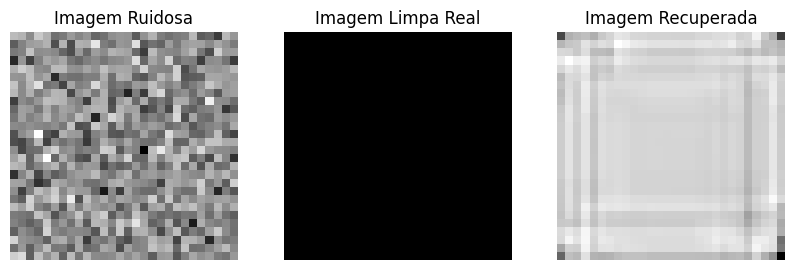

In [2]:
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# 1. Gerar dados de treinamento
# Gerar imagens limpas
def gerar_imagens_limpa(n_samples, size=(28,28)):
    imagens = []
    for _ in range(n_samples):
        img = np.ones(size) * np.random.randint(50,200)
        imagens.append(img)
    return np.array(imagens)

# Adicionar ruído às imagens
def add_ruido(imagens, noise_factor=0.5):
    ruidosas = imagens + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imagens.shape)
    ruidosas = np.clip(ruidosas, 0., 255.)
    return ruidosas

# Gerar dataset
n_samples = 1000
x_train_clean = gerar_imagens_limpa(n_samples)
x_train_noisy = add_ruido(x_train_clean)

# Normalizar
x_train_clean = x_train_clean / 255.
x_train_noisy = x_train_noisy / 255.

# Reshape para CNN
x_train_clean = x_train_clean.reshape(-1,28,28,1)
x_train_noisy = x_train_noisy.reshape(-1,28,28,1)

# 2. Construir o Autoencoder
input_img = layers.Input(shape=(28,28,1))
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. Treinar o autoencoder
autoencoder.fit(x_train_noisy, x_train_clean,
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_split=0.2)

# 4. Testar com uma imagem ruidosa
test_img = x_train_noisy[0]
recovered_img = autoencoder.predict(test_img.reshape(1,28,28,1))

# Visualizar resultado
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("Imagem Ruidosa")
plt.imshow(test_img.squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Imagem Limpa Real")
plt.imshow(x_train_clean[0], cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Imagem Recuperada")
plt.imshow(recovered_img.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 350ms/step - loss: 0.6851 - val_loss: 0.6438
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 330ms/step - loss: 0.6441 - val_loss: 0.6331
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 456ms/step - loss: 0.6368 - val_loss: 0.6318
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 321ms/step - loss: 0.6341 - val_loss: 0.6291
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - loss: 0.6339 - val_loss: 0.6283
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - loss: 0.6331 - val_loss: 0.6290
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 285ms/step - loss: 0.6341 - val_loss: 0.6269
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 342ms/step - loss: 0.6314 - val_loss: 0.6261
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - loss: 0.6313 - val_loss: 0.6252
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - loss: 0.6312 - val_loss: 0.6236
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 291ms/step - loss: 0.6267 - val_loss: 0.6215
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 2

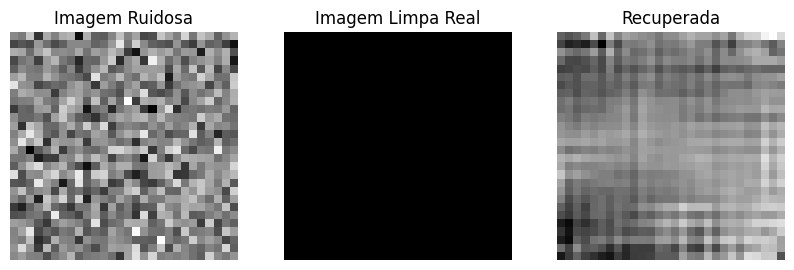

In [3]:
# Instalar dependências
!pip install tensorflow matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# 1. Gerar mais dados e aumentá-los
def gerar_imagens_limpa(n_samples, size=(28,28)):
    imagens = []
    for _ in range(n_samples):
        # Criar imagens com padrões variados
        base = np.ones(size) * np.random.randint(50, 200)
        # Adiciona formas aleatórias
        if np.random.rand() > 0.5:
            # Adiciona uma linha aleatória
            row = np.random.randint(0, size[0])
            base[row, :] = 255
        if np.random.rand() > 0.5:
            # Adiciona uma coluna aleatória
            col = np.random.randint(0, size[1])
            base[:, col] = 255
        imagens.append(base)
    return np.array(imagens)

n_samples = 2000  # maior quantidade para treinar melhor
x_train_clean = gerar_imagens_limpa(n_samples)
x_train_noisy = x_train_clean + np.random.normal(0, 30, x_train_clean.shape)

# Clip para manter valores válidos
x_train_noisy = np.clip(x_train_noisy, 0, 255)

# Normalizar
x_train_clean = x_train_clean / 255.
x_train_noisy = x_train_noisy / 255.

# Reshape para CNN
x_train_clean = x_train_clean.reshape(-1,28,28,1)
x_train_noisy = x_train_noisy.reshape(-1,28,28,1)

# 2. Criar o autoencoder mais eficiente
input_img = layers.Input(shape=(28,28,1))
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

# Camada de código (latent space)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)

# Decodificação
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 3. Treinar com EarlyStopping para ajustar melhor
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = autoencoder.fit(x_train_noisy, x_train_clean,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_split=0.2,
                callbacks=[early_stop])

# 4. Testar com uma imagem ruidosa
test_img = x_train_noisy[0]
recovered_img = autoencoder.predict(test_img.reshape(1,28,28,1))

# Visualização
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.title("Imagem Ruidosa")
plt.imshow(test_img.squeeze(), cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title("Imagem Limpa Real")
plt.imshow(x_train_clean[0], cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title("Recuperada")
plt.imshow(recovered_img.squeeze(), cmap='gray')
plt.axis('off')
plt.show()